In [1]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from time import time
from operator import itemgetter
from scipy.stats import randint
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import  cross_val_score
import os
import subprocess
from time import time
from operator import itemgetter
from scipy.stats import randint
import pandas as pd
from sklearn.ensemble import BaggingClassifier
import numpy as np

filename = 'df_imputed_vclean.pkl'
df_imputed = pd.read_pickle(filename)
df = df_imputed.drop_duplicates(keep='first')

X = df[df.columns[:-1]]
y = pd.Series(df['heartdisease'])
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.33,shuffle = True, random_state=45)
pprint('--Data splitted done')

'--Data splitted done'


/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Sanchezj/scipyenv/scipy2/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


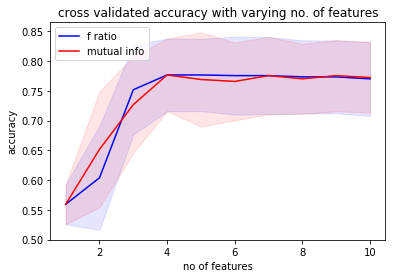

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer


results_f = list()
std_f = list()
results_mi = list()
std_mi = list()
cv = StratifiedKFold(n_splits=10)
model_Logistic_Regression = LogisticRegression(penalty= 'l2', C = 0.01)


for i in range(1,11,1):
    pipe = Pipeline([('select_feat',SelectKBest(k=i)),
                ('clf',model_Logistic_Regression)])
    cv_scores = cross_val_score(pipe,X,y,cv=cv,n_jobs=-1)
    results_f.append(cv_scores.mean())
    std_f.append(cv_scores.std())
    pipe = Pipeline([('select_feat',SelectKBest(k=i,score_func = mutual_info_classif)),
                ('clf',model_Logistic_Regression)])
    cv_scores = cross_val_score(pipe,X,y,cv=cv,n_jobs=-1)
    results_mi.append(cv_scores.mean())
    std_mi.append(cv_scores.std())
    
results_mi,std_mi,results_f,std_f = np.array(results_mi),np.array(std_mi),np.array(results_f),np.array(std_f)    
plt.plot(range(1,11,1),results_f,c='b',label='f ratio')
plt.fill_between(range(1,11,1),results_f-std_f,results_f+std_f,alpha = .1,color='b')
plt.plot(range(1,11,1),results_mi,c='r',label = 'mutual info')
plt.fill_between(range(1,11,1),results_mi-std_mi,results_mi+std_mi,alpha=.1,color='r')
plt.legend(loc='upper left')
plt.xlabel('no of features')
plt.ylabel('accuracy')
plt.title('cross validated accuracy with varying no. of features')
plt.show()

In [6]:
from sklearn.feature_selection import VarianceThreshold

def remove_feat_constants(data_frame):
    # from https://www.kaggle.com/tuomastik/santander-customer-satisfaction/pca-visualization
    # script by Tuomas Tikkanen
    # Remove feature vectors containing one unique value,
    # because such features do not have predictive value.
    # Let's get the zero variance features by fitting VarianceThreshold
    # selector to the data, but let's not transform the data with
    # the selector because it will also transform our Pandas data frame into
    # NumPy array and we would like to keep the Pandas data frame. Therefore,
    # let's delete the zero variance features manually.
    n_features_originally = data_frame.shape[1]

    selector =  VarianceThreshold(threshold=(.8 * (1 - .8)))
    selector.fit(data_frame)
    # Get the indices of zero variance feats
    feat_ix_keep = selector.get_support(indices=True)
    orig_feat_ix = np.arange(data_frame.columns.size)
    feat_ix_delete = np.delete(orig_feat_ix, feat_ix_keep)
    # Delete zero variance feats from the original pandas data frame
    data_frame = data_frame.drop(labels=data_frame.columns[feat_ix_delete],
                                 axis=1)
    # Print info
    n_features_deleted = feat_ix_delete.size
    print("  - Deleted %s / %s features (~= %.1f %%)" % (
        n_features_deleted, n_features_originally,
        100.0 * (np.float(n_features_deleted) / n_features_originally)))
    return data_frame

In [7]:
df_reduced = remove_feat_constants(df)
df_reduced.info()
df = df_reduced

  - Deleted 1 / 12 features (~= 8.3 %)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 919
Data columns (total 11 columns):
age             919 non-null float64
sex             919 non-null float64
cp              919 non-null category
trestbps        919 non-null float64
chol            919 non-null float64
restecg         919 non-null float64
thalach         919 non-null float64
exang           919 non-null float64
oldpeak         919 non-null float64
slope           919 non-null float64
heartdisease    919 non-null category
dtypes: category(2), float64(9)
memory usage: 113.9 KB


In [34]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score

X = df[df.columns[:-1]]
Y = pd.Series(df['heartdisease'])


train_X,test_X,train_Y,test_Y =train_test_split(X,Y,test_size=0.33,shuffle = True, random_state=45)

print(train_X.shape,train_Y.shape,test_X.shape, test_Y.shape)




(616, 7) (616,) (304, 7) (304,)


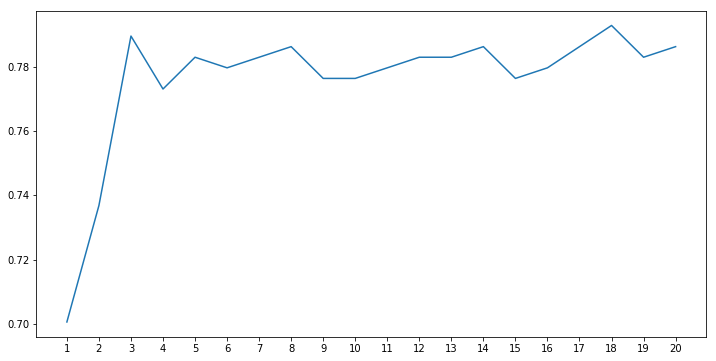

Accuracies for different values of n are: [0.70065789 0.73684211 0.78947368 0.77302632 0.78289474 0.77960526
 0.78289474 0.78618421 0.77631579 0.77631579 0.77960526 0.78289474
 0.78289474 0.78618421 0.77631579 0.77960526 0.78618421 0.79276316
 0.78289474 0.78618421] with the max value as  0.7927631578947368  with index:  17


In [35]:
a_index=list(range(1,21))
a=pd.Series()
x=list(range(1, 21))
for i in list(range(1,21)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',(a.values.max()), ' with index: ', a.values.argmax(axis=0))

model_KNN = KNeighborsClassifier(n_neighbors=19)





In [36]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1,probability=True )
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
pred_training = model.predict(train_X)
print('Test Accuracy for linear SVM is',metrics.accuracy_score(test_Y, prediction2))
print('Training Accuracy for linear SVM is',metrics.accuracy_score(train_Y, pred_training))



#print('F1 micro: is',f1_score(test_Y, prediction2, average='micro'))
#print('F1 macro: is',f1_score(test_Y, prediction2, average='macro'))
#print('F1 weighted: is',f1_score(test_Y, prediction2, average='weighted'))



model_Linear_SVM = model
        
    








Test Accuracy for linear SVM is 0.7664473684210527
Training Accuracy for linear SVM is 0.7564935064935064


In [37]:
model=svm.SVC(kernel='rbf',C=1e4,gamma=1e-4, probability=True)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

pred_training = model.predict(train_X)
print('Training Accuracy for rbf SVM is',metrics.accuracy_score(train_Y, pred_training))


#print('F1 micro: is',f1_score(test_Y, prediction1, average='micro'))
#print('F1 macro: is',f1_score(test_Y, prediction1, average='macro'))
#print('F1 weighted: is',f1_score(test_Y, prediction1, average='weighted'))
model_RBF_SVM = model




Accuracy for rbf SVM is  0.7664473684210527
Training Accuracy for rbf SVM is 0.7564935064935064


The accuracy of the Decision Tree is 0.7763157894736842
Training Accuracy for Decision Tree is 0.7711038961038961


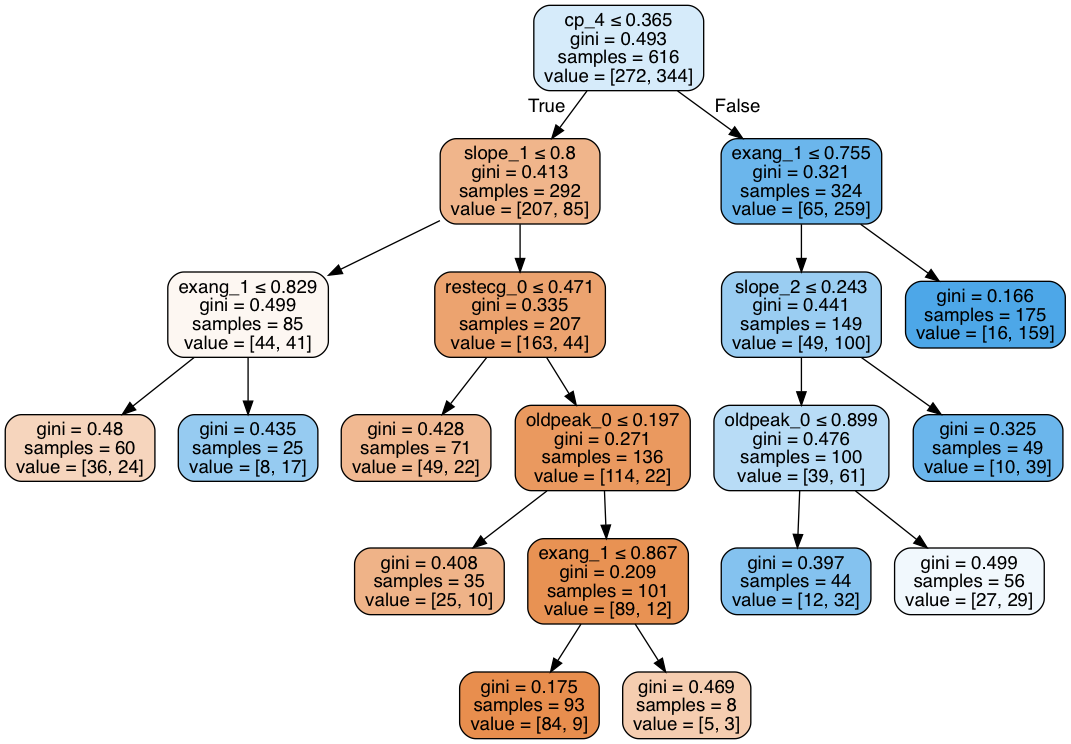

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus




model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')


model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

pred_training = model.predict(train_X)
print('Training Accuracy for Decision Tree is',metrics.accuracy_score(train_Y, pred_training))

#print('F1 micro: is',f1_score(test_Y, prediction4, average='micro'))
#print('F1 macro: is',f1_score(test_Y, prediction4, average='macro'))
#print('F1 weighted: is',f1_score(test_Y, prediction4, average='weighted'))




model_Decision_Tree = model

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=train_X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

plt.show(graph)

Image(graph.create_png())

#graph.write_pdf("decision_tree_OHE.pdf")




In [39]:
train_y = train_Y
test_y = test_Y
rfc_best = RandomForestClassifier(n_estimators= 400,
               max_features= 'sqrt',
               max_depth= 30,
               min_samples_split= 2,
               min_samples_leaf= 4,
               bootstrap= True)
rfc_base = RandomForestClassifier(n_estimators= 200, random_state = 42)



rfc_base.fit(train_X, train_y)
rfc_best.fit(train_X, train_y)
prediction_base=rfc_base.predict(test_X)
prediction_best=rfc_best.predict(test_X)


print('Test Accuracy for RF base is ',metrics.accuracy_score(prediction_base,test_y))
print('Test Accuracy for RF best is ',metrics.accuracy_score(prediction_best,test_y))


prediction_base_train=rfc_base.predict(train_X)
prediction_best_train=rfc_best.predict(train_X)
print('Train Accuracy for RF base is ',metrics.accuracy_score(train_y,prediction_base_train))
print('Train Accuracy for RF best is ',metrics.accuracy_score(train_y,prediction_best_train))


model_RandomForest = rfc_best




Test Accuracy for RF base is  0.7796052631578947
Test Accuracy for RF best is  0.7796052631578947
Train Accuracy for RF base is  0.7808441558441559
Train Accuracy for RF best is  0.7808441558441559


In [40]:
model = LogisticRegression(penalty= 'l2', C = 0.01)

model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

pred_training = model.predict(train_X)
print('Training Accuracy for Logistic Regression is',metrics.accuracy_score(train_Y, pred_training))


#print('F1 micro: is',f1_score(test_Y, prediction3, average='micro'))
#print('F1 macro: is',f1_score(test_Y, prediction3, average='macro'))
#print('F1 weighted: is',f1_score(test_Y, prediction3, average='weighted'))

model_Logistic_Regression = model
#model.get_params()




The accuracy of the Logistic Regression is 0.805921052631579
Training Accuracy for Logistic Regression is 0.75


In [41]:


from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction




kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Random Forest']
models=[model_Linear_SVM, model_RBF_SVM, model_Logistic_Regression, model_KNN, model_Decision_Tree,  model_RandomForest ]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.759783,0.052905
Radial Svm,0.759783,0.052905
Logistic Regression,0.750000,0.069938
KNN,0.746739,0.063203
Decision Tree,0.751087,0.061766
Random Forest,0.741304,0.062968


In [42]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer


scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'F-score': make_scorer( f1_score),
           'accuracy': make_scorer(accuracy_score)}

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Random Forest']
models=[model_Linear_SVM, model_RBF_SVM, model_Logistic_Regression, model_KNN, model_Decision_Tree,  model_RandomForest ]

fit_time = []
score_time = []

test_accuracy = []
test_accuracy_std = []
train_accuracy = []
train_accuracy_std = []


test_F_score = []
test_F_score_std = []
train_F_score = []
train_F_score_std = []


test_precision = []
test_precision_std = []
train_precision = []
train_precision_std = []


test_recall = []
test_recall_std = []
train_recall = []
train_recall_std = []






for i in models:
    model = i
    scores = cross_validate(model,X,Y, cv = kfold, scoring = scoring, return_train_score=True)
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    
    test_accuracy.append(scores['test_accuracy'].mean())
    test_accuracy_std.append(scores['test_accuracy'].std())
    train_accuracy.append(scores['train_accuracy'].mean())
    train_accuracy_std.append(scores['train_accuracy'].std())
    
    test_F_score.append(scores['test_F-score'].mean())
    test_F_score_std.append(scores['test_F-score'].std())
    train_F_score.append(scores['train_F-score'].mean())
    train_F_score_std.append(scores['train_F-score'].std())
    
    test_precision.append(scores['test_precision'].mean())
    test_precision_std.append(scores['test_precision'].std())
    train_precision.append(scores['train_precision'].mean())
    train_precision_std.append(scores['train_precision'].std())
    
    test_recall.append(scores['test_recall'].mean())
    test_recall_std.append(scores['test_recall'].std())
    train_recall.append(scores['train_recall'].mean())
    train_recall_std.append(scores['train_recall'].std())
    

    print('Model: ' + str(i))

sorted(scores.keys())     
dct_acc = {'Test_accuracy':test_accuracy,
               'Test_accuracy_std':test_accuracy_std,
               'Train_accuracy':train_accuracy,
               'Train_accuracy_std':train_accuracy_std, }
dct_Fscore = {'Test_F_score':test_F_score,
               'Test_F_score_std':test_F_score_std,
               'Train_F_score': train_F_score,
               'Train_F_score_std': train_F_score_std}
dct_precision = {'Test_precision': test_precision,
               'Test_precision_std': test_precision_std,
               'Train_precision': train_precision,
               'Train_precision_std': train_precision_std}
dct_recall = {'Test_Sensitivity': test_recall, 
               'Test_Sensitivity_std': test_recall_std,
               'Train_Sensitivity': train_recall,
               'Train_Sensitivity_std': train_recall_std}
dct_time = {'Fit_time': fit_time, 'Scoring Time':score_time}

metrics_acc=pd.DataFrame(dct_acc,index=classifiers)       
metrics_Fsc = pd.DataFrame(dct_Fscore,index=classifiers)
metrics_precision = pd.DataFrame(dct_precision,index=classifiers) 
metrics_recall = pd.DataFrame(dct_recall,index=classifiers)
metrics_time = pd.DataFrame(dct_time,index=classifiers)
           
display(metrics_acc)
display(metrics_Fsc)
display(metrics_precision)
display(metrics_recall)
display(metrics_time)



#new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
#new_models_dataframe2

Model: SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Model: SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Model: LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')
Model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
      

,Test_accuracy,Test_accuracy_std,Train_accuracy,Train_accuracy_std
Linear Svm,0.759783,0.052905,0.759783,0.005878
Radial Svm,0.759783,0.052905,0.759783,0.005878
Logistic Regression,0.750000,0.069938,0.765700,0.005264
KNN,0.746739,0.063203,0.776208,0.005942
Decision Tree,0.751087,0.061766,0.777174,0.005131
Random Forest,0.738043,0.062903,0.781643,0.005556


,Test_F_score,Test_F_score_std,Train_F_score,Train_F_score_std
Linear Svm,0.769388,0.055988,0.779948,0.007329
Radial Svm,0.769388,0.055988,0.779948,0.007329
Logistic Regression,0.764486,0.060262,0.785542,0.014961
KNN,0.759775,0.066844,0.792209,0.012939
Decision Tree,0.760464,0.055648,0.790411,0.014778
Random Forest,0.757808,0.068698,0.800992,0.015494


,Test_precision,Test_precision_std,Train_precision,Train_precision_std
Linear Svm,0.775633,0.093251,0.790109,0.011657
Radial Svm,0.775633,0.093251,0.790109,0.011657
Logistic Regression,0.775505,0.110630,0.794289,0.012875
KNN,0.768670,0.132123,0.813410,0.017976
Decision Tree,0.782967,0.110179,0.823286,0.024534
Random Forest,0.748490,0.137681,0.806388,0.017609


,Test_Sensitivity,Test_Sensitivity_std,Train_Sensitivity,Train_Sensitivity_std
Linear Svm,0.769051,0.044677,0.770118,0.005819
Radial Svm,0.769051,0.044677,0.770118,0.005819
Logistic Regression,0.771951,0.093223,0.778455,0.036903
KNN,0.768256,0.066382,0.773345,0.031941
Decision Tree,0.752710,0.072301,0.762796,0.045269
Random Forest,0.786583,0.063821,0.798043,0.045546


,Fit_time,Scoring Time
Linear Svm,0.029434,0.003982
Radial Svm,0.255682,0.005380
Logistic Regression,0.001806,0.002080
KNN,0.001361,0.007271
Decision Tree,0.001393,0.002223
Random Forest,0.569740,0.124566
